In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# **Data**

In [ ]:
data = pd.read_csv('gold_futures(in).csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price Movement
0,1/2/2020,1518.099976,1528.699951,1518.000000,1524.500000,1524.500000,214,Up
1,1/3/2020,1530.099976,1552.699951,1530.099976,1549.199951,1549.199951,107,Up
2,1/6/2020,1580.000000,1580.000000,1560.400024,1566.199951,1566.199951,416,Up
3,1/7/2020,1558.300049,1576.300049,1558.300049,1571.800049,1571.800049,47,Up
4,1/8/2020,1579.699951,1604.199951,1552.300049,1557.400024,1557.400024,236,Down


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price Movement
0,2020-01-02,1518.099976,1528.699951,1518.000000,1524.500000,1524.500000,214,Up
1,2020-01-03,1530.099976,1552.699951,1530.099976,1549.199951,1549.199951,107,Up
2,2020-01-06,1580.000000,1580.000000,1560.400024,1566.199951,1566.199951,416,Up
3,2020-01-07,1558.300049,1576.300049,1558.300049,1571.800049,1571.800049,47,Up
4,2020-01-08,1579.699951,1604.199951,1552.300049,1557.400024,1557.400024,236,Down


# **Feature Extraction**

## **PVT**

In [ ]:
def calculate_pvt(data):

    pvt = (data['Close'].diff() / data['Close'].shift(1)) * data['Volume']
    return pvt.cumsum()

data['PVT'] = calculate_pvt(data)


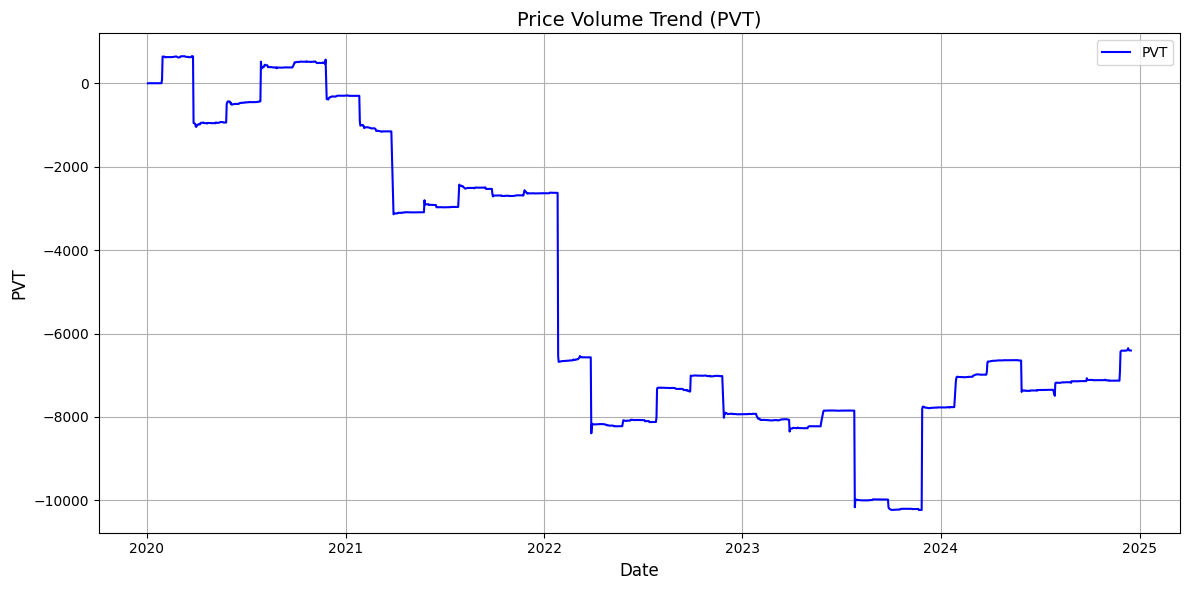

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['PVT'], label='PVT', color='blue', linewidth=1.5)

plt.title('Price Volume Trend (PVT)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('PVT', fontsize=12)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

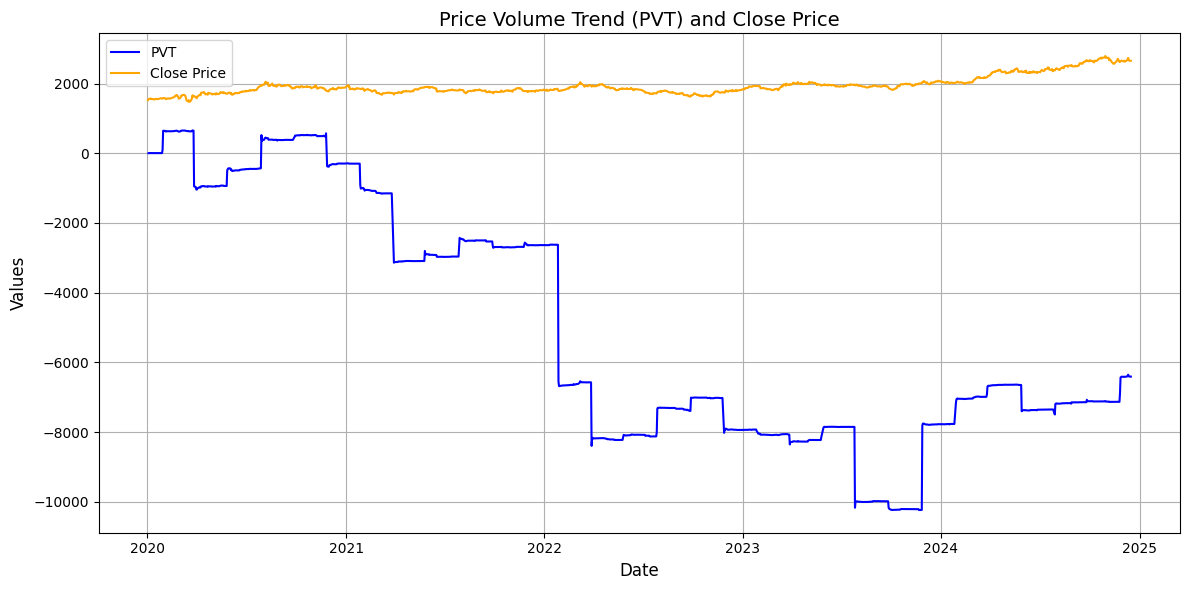

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(data['Date'], data['PVT'], label='PVT', color='blue', linewidth=1.5)

plt.plot(data['Date'], data['Close'], label='Close Price', color='orange', linewidth=1.5)

plt.title('Price Volume Trend (PVT) and Close Price', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


## **Fibonacci**

In [ ]:
# # Calculate Fibonacci retracement levels
# high_price = data['High'].max()
# low_price = data['Low'].min()

# data['Fib_0%'] = high_price
# data['Fib_23.6%'] = high_price - (high_price - low_price) * 0.236
# data['Fib_38.2%'] = high_price - (high_price - low_price) * 0.382
# data['Fib_50%'] = high_price - (high_price - low_price) * 0.5
# data['Fib_61.8%'] = high_price - (high_price - low_price) * 0.618
# data['Fib_78.6%'] = high_price - (high_price - low_price) * 0.786
# data['Fib_100%'] = low_price

# # Save the updated dataset
# output_file_path = 'gold_futures_with_fibonacci.csv'
# data.to_csv(output_file_path, index=False)

# print("Fibonacci retracement levels added and dataset saved to:", output_file_path)

In [ ]:
# # Plot the price data and Fibonacci retracement levels
# plt.figure(figsize=(12, 6))

# # Plot the Close prices
# plt.plot(data['Date'], data['Close'], label='Close Price', color='blue', linewidth=1.5)

# # Plot Fibonacci retracement levels
# plt.axhline(y=high_price, color='red', linestyle='--', label='Fib 0% (High)')
# plt.axhline(y=data['Fib_23.6%'].iloc[0], color='orange', linestyle='--', label='Fib 23.6%')
# plt.axhline(y=data['Fib_38.2%'].iloc[0], color='green', linestyle='--', label='Fib 38.2%')
# plt.axhline(y=data['Fib_50%'].iloc[0], color='purple', linestyle='--', label='Fib 50%')
# plt.axhline(y=data['Fib_61.8%'].iloc[0], color='brown', linestyle='--', label='Fib 61.8%')
# plt.axhline(y=data['Fib_78.6%'].iloc[0], color='pink', linestyle='--', label='Fib 78.6%')
# plt.axhline(y=low_price, color='black', linestyle='--', label='Fib 100% (Low)')

# # Add titles and labels
# plt.title('Fibonacci Retracement Levels with Closing Prices', fontsize=14)
# plt.xlabel('Date', fontsize=12)
# plt.ylabel('Price', fontsize=12)
# plt.legend()
# plt.grid()

# # Display the plot
# plt.tight_layout()
# plt.show()

**Specific Year Filter**

In [ ]:
# yearly_data = data[data['Date'].dt.year == 2023]

# # Calculate Fibonacci retracement levels for the filtered year
# high_price_yearly = yearly_data['High'].max()
# low_price_yearly = yearly_data['Low'].min()

# # Add Fibonacci levels to the filtered dataset
# yearly_data['Fib_0%'] = high_price_yearly
# yearly_data['Fib_23.6%'] = high_price_yearly - (high_price_yearly - low_price_yearly) * 0.236
# yearly_data['Fib_38.2%'] = high_price_yearly - (high_price_yearly - low_price_yearly) * 0.382
# yearly_data['Fib_50%'] = high_price_yearly - (high_price_yearly - low_price_yearly) * 0.5
# yearly_data['Fib_61.8%'] = high_price_yearly - (high_price_yearly - low_price_yearly) * 0.618
# yearly_data['Fib_78.6%'] = high_price_yearly - (high_price_yearly - low_price_yearly) * 0.786
# yearly_data['Fib_100%'] = low_price_yearly

# # Plot the Close prices and Fibonacci retracement levels for the filtered year
# plt.figure(figsize=(12, 6))

# # Plot the Close prices
# plt.plot(yearly_data['Date'], yearly_data['Close'], label='Close Price', color='blue', linewidth=1.5)

# # Plot Fibonacci retracement levels
# plt.axhline(y=high_price_yearly, color='red', linestyle='--', label='Fib 0% (High)')
# plt.axhline(y=yearly_data['Fib_23.6%'].iloc[0], color='orange', linestyle='--', label='Fib 23.6%')
# plt.axhline(y=yearly_data['Fib_38.2%'].iloc[0], color='green', linestyle='--', label='Fib 38.2%')
# plt.axhline(y=yearly_data['Fib_50%'].iloc[0], color='purple', linestyle='--', label='Fib 50%')
# plt.axhline(y=yearly_data['Fib_61.8%'].iloc[0], color='brown', linestyle='--', label='Fib 61.8%')
# plt.axhline(y=yearly_data['Fib_78.6%'].iloc[0], color='pink', linestyle='--', label='Fib 78.6%')
# plt.axhline(y=low_price_yearly, color='black', linestyle='--', label='Fib 100% (Low)')

# # Add labels, title, and legend
# plt.title('Fibonacci Retracement Levels for 2023', fontsize=14)
# plt.xlabel('Date', fontsize=12)
# plt.ylabel('Price', fontsize=12)
# plt.legend()
# plt.grid()

# # Display the plot
# plt.tight_layout()
# plt.show()

## **CCI**

In [ ]:
def calculate_cci(data, window=20):

    tp = (data['High'] + data['Low'] + data['Close']) / 3

    sma = tp.rolling(window=window).mean()

    mean_deviation = tp.rolling(window=window).apply(lambda x: np.mean(np.abs(x - np.mean(x))), raw=True)

    cci = (tp - sma) / (0.015 * mean_deviation)

    return cci

data['CCI'] = calculate_cci(data, window=10)

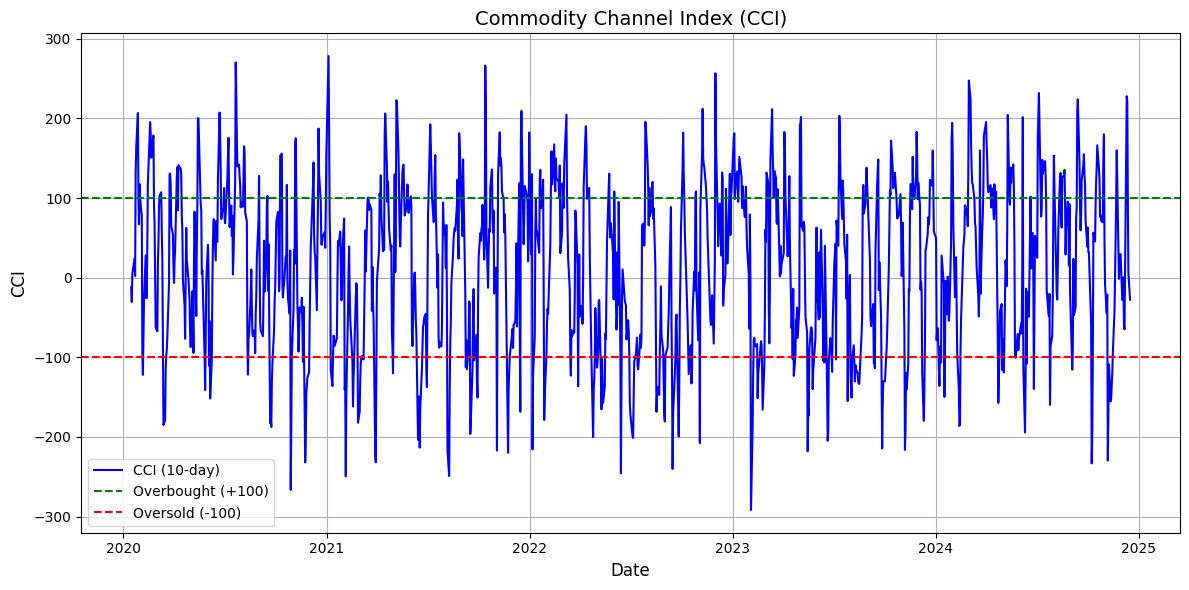

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['CCI'], label='CCI (10-day)', color='blue', linewidth=1.5)
plt.axhline(y=100, color='green', linestyle='--', label='Overbought (+100)')
plt.axhline(y=-100, color='red', linestyle='--', label='Oversold (-100)')
plt.title('Commodity Channel Index (CCI)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('CCI', fontsize=12)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## **OBV**

In [ ]:
# def calculate_obv(data):
#     """
#     Calculate the On-Balance Volume (OBV).
#     :param data: A pandas DataFrame with 'Close' and 'Volume' columns.
#     :return: A pandas Series with the OBV values.
#     """
#     obv = [0]  # Start OBV with 0
#     for i in range(1, len(data)):
#         if data['Close'].iloc[i] > data['Close'].iloc[i - 1]:
#             obv.append(obv[-1] + data['Volume'].iloc[i])  # Add volume on up days
#         elif data['Close'].iloc[i] < data['Close'].iloc[i - 1]:
#             obv.append(obv[-1] - data['Volume'].iloc[i])  # Subtract volume on down days
#         else:
#             obv.append(obv[-1])  # No change on equal Close prices
#     return pd.Series(obv, index=data.index)

# # Add OBV to the dataset
# data['OBV'] = calculate_obv(data)

In [ ]:
# # Plot the OBV
# plt.figure(figsize=(12, 6))
# plt.plot(data['Date'], data['OBV'], label='OBV', color='blue', linewidth=1.5)
# plt.title('On-Balance Volume (OBV)', fontsize=14)
# plt.xlabel('Date', fontsize=12)
# plt.ylabel('OBV', fontsize=12)
# plt.legend()
# plt.grid()

# # Show the plot
# plt.tight_layout()
# plt.show()

In [ ]:
# # Plot the OBV and Closing Price
# fig, ax1 = plt.subplots(figsize=(12, 6))

# # Plot OBV on the primary y-axis
# ax1.plot(data['Date'], data['OBV'], label='OBV', color='blue', linewidth=1.5)
# ax1.set_ylabel('OBV', fontsize=12)
# ax1.set_xlabel('Date', fontsize=12)
# ax1.tick_params(axis='y', labelcolor='blue')

# # Create a secondary y-axis for the closing price
# ax2 = ax1.twinx()
# ax2.plot(data['Date'], data['Close'], label='Close Price', color='orange', linewidth=1.5, linestyle='--')
# ax2.set_ylabel('Close Price', fontsize=12)
# ax2.tick_params(axis='y', labelcolor='orange')

# # Add titles and legends
# plt.title('OBV and Closing Price Trend', fontsize=14)
# fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
# plt.grid()

# # Show the plot
# plt.tight_layout()
# plt.show()

# **Feature Importance**

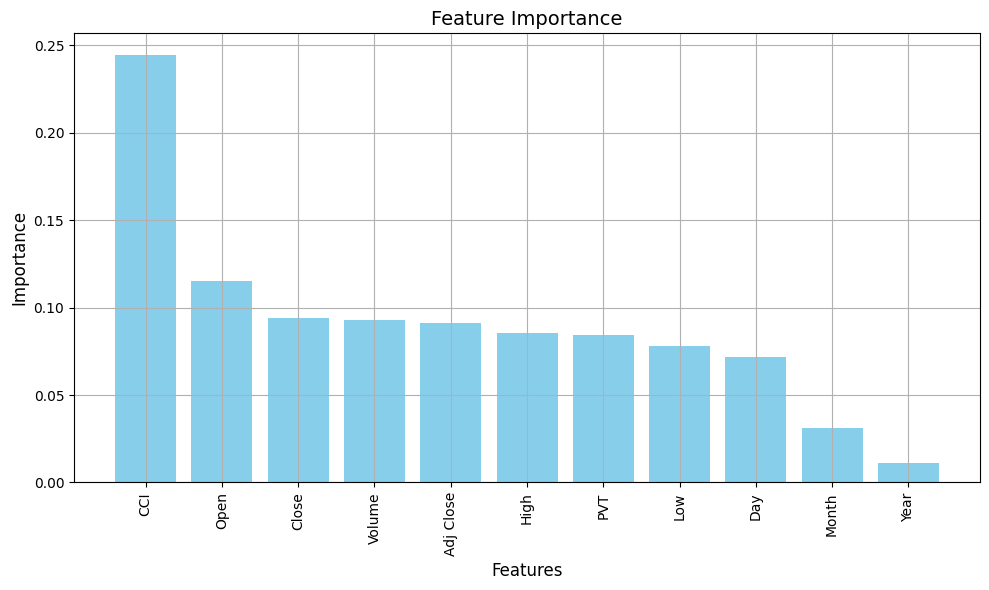

In [ ]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

dataWithoutDate = data.drop(['Date', 'Price Movement'], axis=1)
y = data["Price Movement"]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataWithoutDate, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importance = model.feature_importances_
feature_names = dataWithoutDate.columns

feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance["Feature"], feature_importance["Importance"], color='skyblue')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance", fontsize=12)
plt.title("Feature Importance", fontsize=14)
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
dataWithoutDate.head()

,Open,High,Low,Close,Adj Close,Volume,PVT,CCI,Year,Month,Day
0,1518.099976,1528.699951,1518.000000,1524.500000,1524.500000,214,NaN,NaN,2020,1,2
1,1530.099976,1552.699951,1530.099976,1549.199951,1549.199951,107,1.733614,NaN,2020,1,3
2,1580.000000,1580.000000,1560.400024,1566.199951,1566.199951,416,6.298551,NaN,2020,1,6
3,1558.300049,1576.300049,1558.300049,1571.800049,1571.800049,47,6.466604,NaN,2020,1,7
4,1579.699951,1604.199951,1552.300049,1557.400024,1557.400024,236,4.304493,NaN,2020,1,8


# **Permutation Importance**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

dataWithoutDate = data.drop(columns=["Date", "Price Movement"])
y = data["Price Movement"] # Encode target as binary

X_train, X_test, y_train, y_test = train_test_split(dataWithoutDate, y, test_size=0.33, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

baseline_accuracy = accuracy_score(y_test, model.predict(X_test))
baseline_accuracy


0.6520681265206812

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

importance_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": result.importances_mean
}).sort_values(by="Importance", ascending=False)

importance_df

,Feature,Importance
7,CCI,0.087348
0,Open,0.048905
3,Close,0.031630
4,Adj Close,0.025791
8,Year,0.002676
6,PVT,-0.004380
2,Low,-0.004866
1,High,-0.005596
9,Month,-0.009002
10,Day,-0.010462


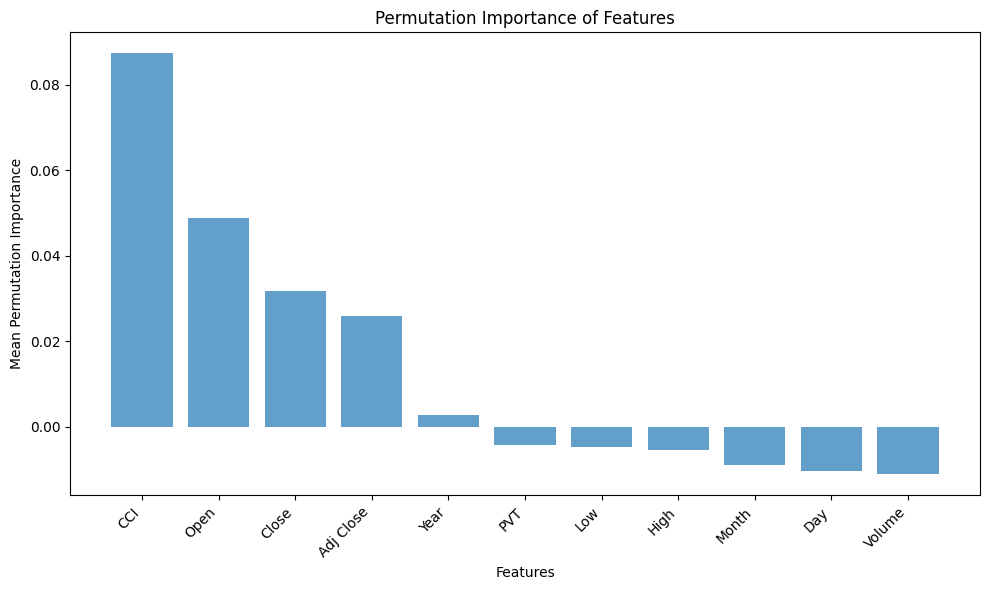

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(importance_df["Feature"], importance_df["Importance"], alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Mean Permutation Importance")
plt.title("Permutation Importance of Features")
plt.tight_layout()
plt.show()


In [ ]:
importance = model.feature_importances_
feature_names = dataWithoutDate.columns

In [ ]:
feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)
feature_importance

,Feature,Importance
7,CCI,0.253055
0,Open,0.113743
5,Volume,0.092468
3,Close,0.089451
4,Adj Close,0.086650
1,High,0.084003
6,PVT,0.083135
2,Low,0.078005
10,Day,0.074335
9,Month,0.034781


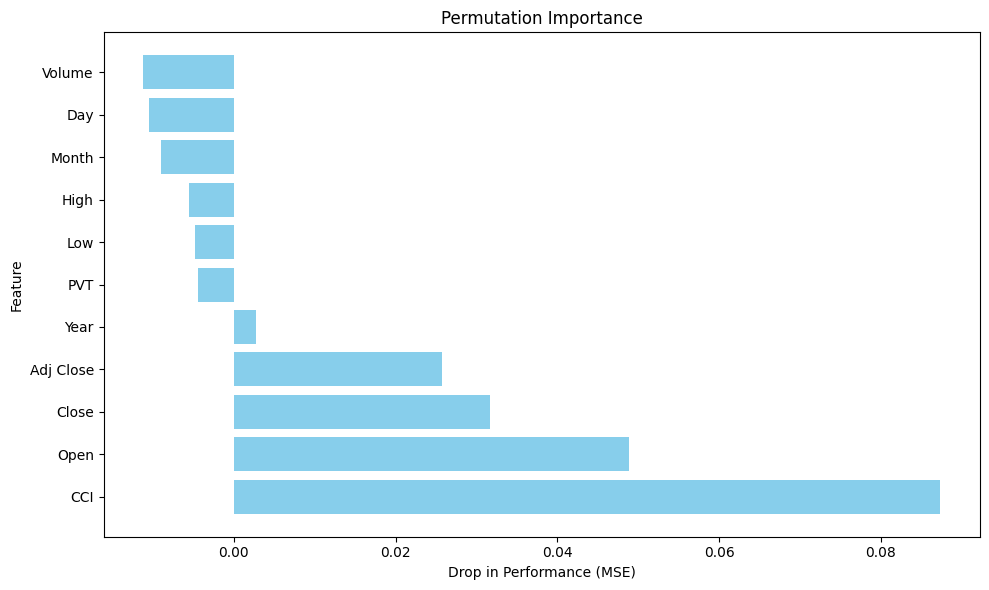

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color='skyblue')
plt.xlabel('Drop in Performance (MSE)')
plt.ylabel('Feature')
plt.title('Permutation Importance')
plt.tight_layout()
plt.show()


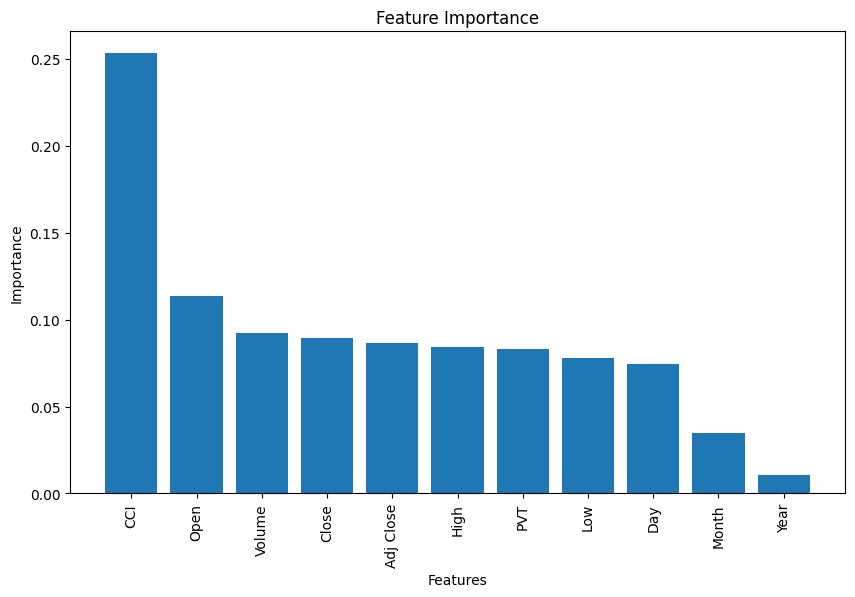

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(feature_importance["Feature"], feature_importance["Importance"])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.xticks(rotation=90)
plt.show()


# **Two Different Machine Learning Classifiers:**

## **RandomForestClassifier and LogisticRegression**

In [ ]:
import pandas as pd

nan_counts = data.isna().sum()
total_nans = data.isna().sum().sum()
print("NaN Counts per Column:")
print(nan_counts)
print(f"\nTotal NaN Values: {total_nans}")

data = data.dropna()




NaN Counts per Column:
Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
Price Movement    0
PVT               1
CCI               9
Year              0
Month             0
Day               0
dtype: int64

Total NaN Values: 10


In [ ]:
data.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Price Movement,0
PVT,0
CCI,0


Training Random Forest...
Random Forest Accuracy: 0.65
Classification Report for Random Forest:

              precision    recall  f1-score   support

        Down       0.63      0.59      0.61       188
          Up       0.67      0.71      0.69       220

    accuracy                           0.65       408
   macro avg       0.65      0.65      0.65       408
weighted avg       0.65      0.65      0.65       408

Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.85
Classification Report for Logistic Regression:

              precision    recall  f1-score   support

        Down       0.85      0.82      0.83       188
          Up       0.85      0.87      0.86       220

    accuracy                           0.85       408
   macro avg       0.85      0.85      0.85       408
weighted avg       0.85      0.85      0.85       408



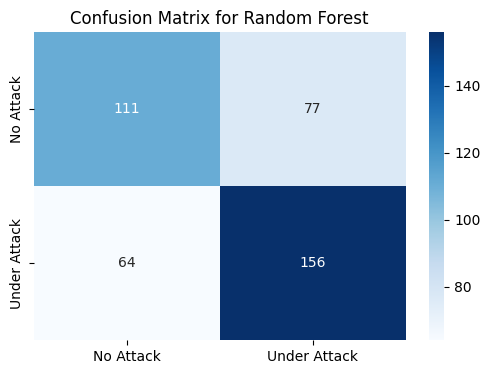

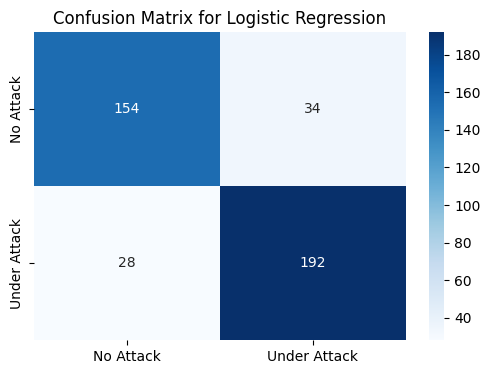

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


X = data.drop(['Date', 'Price Movement'], axis=1)
y = data["Price Movement"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

results = {}
for name, model in classifiers.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

    results[name] = {
        "Model": model,
        "Accuracy": accuracy,
        "Predictions": y_pred
    }

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Attack", "Under Attack"], yticklabels=["No Attack", "Under Attack"])
    plt.title(f"Confusion Matrix for {name}")



# **Best Model With Adv Features and Without Adv Features**

## **With Both (CCI and PVT) Advance Features**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

        Down       0.85      0.82      0.83       188
          Up       0.85      0.87      0.86       220

    accuracy                           0.85       408
   macro avg       0.85      0.85      0.85       408
weighted avg       0.85      0.85      0.85       408



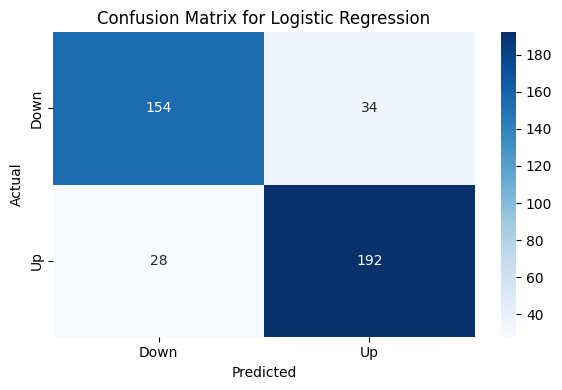

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_adv = data.drop(columns=["Date", "Price Movement"])
y = data["Price Movement"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_adv, y, test_size=0.33, random_state=42)

logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Down", "Up"], yticklabels=["Down", "Up"])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


## **Without Advance Features**

Logistic Regression Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

        Down       0.81      0.81      0.81       188
          Up       0.84      0.84      0.84       220

    accuracy                           0.83       408
   macro avg       0.83      0.83      0.83       408
weighted avg       0.83      0.83      0.83       408



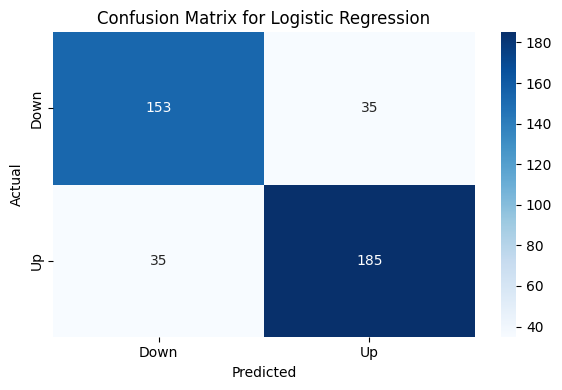

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_not_adv = data.drop(columns=["Date", "Price Movement","PVT","CCI"])
y = data["Price Movement"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_not_adv, y, test_size=0.33, random_state=42)

logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Down", "Up"], yticklabels=["Down", "Up"])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


## **Comparison for all possible cases**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy with PVT: 0.83
Logistic Regression Accuracy with CCI: 0.85
Logistic Regression Accuracy without PVT and CCI: 0.83
Logistic Regression Accuracy with both PVT and CCI: 0.85
             Feature Set  Accuracy  Precision (Up)  Recall (Up)  F1-Score (Up)
0                    PVT  0.828431        0.840909     0.840909       0.840909
1                    CCI  0.848039        0.849558     0.872727       0.860987
2    Without PVT and CCI  0.828431        0.840909     0.840909       0.840909
3  With Both PVT and CCI  0.848039        0.849558     0.872727       0.860987


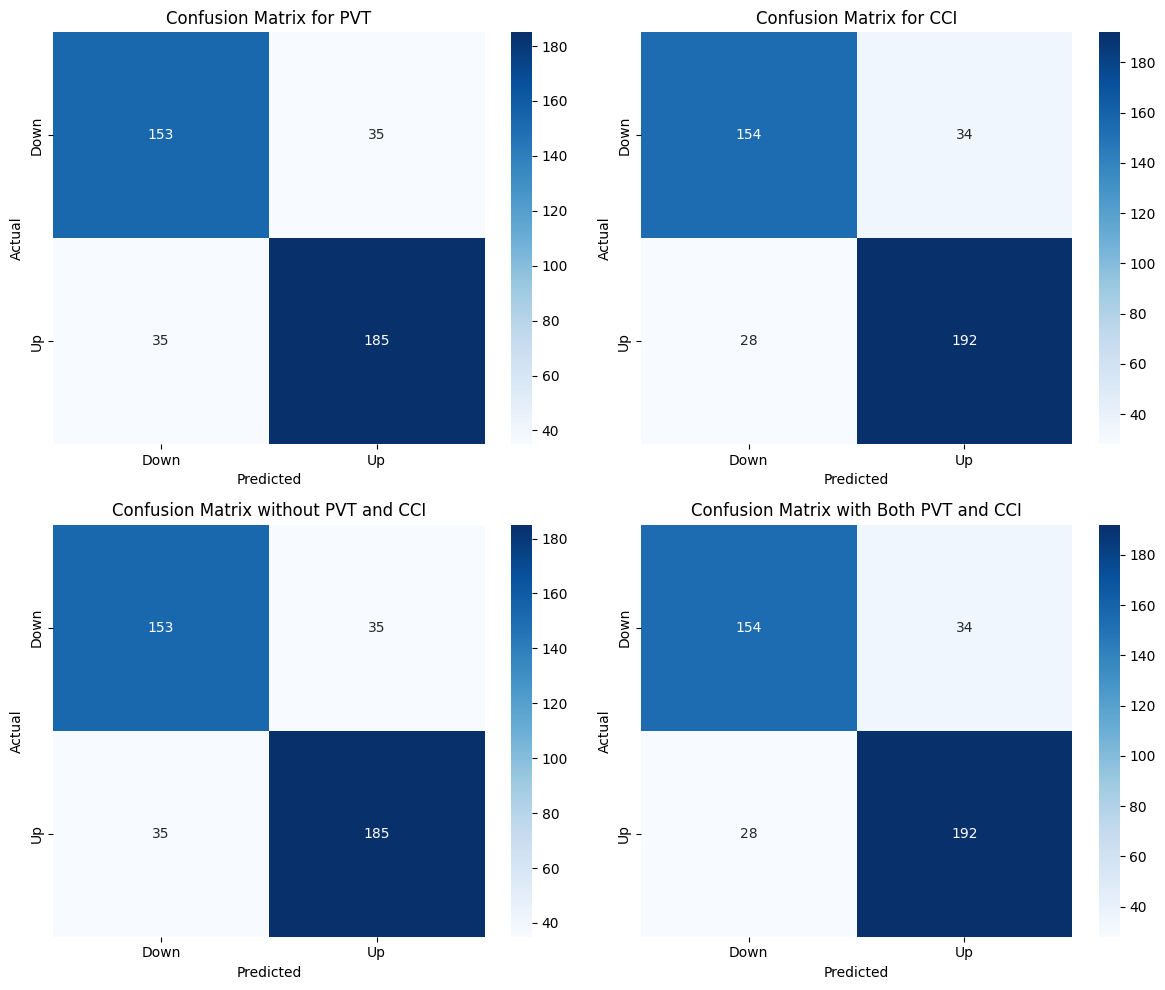

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def train_and_evaluate(data, features_to_exclude, target="Price Movement"):
    X = data.drop(columns=["Date", target] + features_to_exclude)
    y = data[target]

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    logistic_model = LogisticRegression(random_state=42, max_iter=1000)
    logistic_model.fit(X_train, y_train)

    y_pred = logistic_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, report, cm

accuracy_cci, report_cci, cm_cci = train_and_evaluate(data, features_to_exclude=["PVT"])

accuracy_pvt, report_pvt, cm_pvt = train_and_evaluate(data, features_to_exclude=["CCI"])

accuracy_no_pvt_cci, report_no_pvt_cci, cm_no_pvt_cci = train_and_evaluate(data, features_to_exclude=["PVT", "CCI"])

accuracy_with_both, report_with_both, cm_with_both = train_and_evaluate(data, features_to_exclude=[])

print(f"Logistic Regression Accuracy with PVT: {accuracy_pvt:.2f}")
print(f"Logistic Regression Accuracy with CCI: {accuracy_cci:.2f}")
print(f"Logistic Regression Accuracy without PVT and CCI: {accuracy_no_pvt_cci:.2f}")
print(f"Logistic Regression Accuracy with both PVT and CCI: {accuracy_with_both:.2f}")

comparison = pd.DataFrame({
    "Feature Set": ["PVT", "CCI", "Without PVT and CCI", "With Both PVT and CCI"],
    "Accuracy": [accuracy_pvt, accuracy_cci, accuracy_no_pvt_cci, accuracy_with_both],
    "Precision (Up)": [
        report_pvt["Up"]["precision"],
        report_cci["Up"]["precision"],
        report_no_pvt_cci["Up"]["precision"],
        report_with_both["Up"]["precision"],
    ],
    "Recall (Up)": [
        report_pvt["Up"]["recall"],
        report_cci["Up"]["recall"],
        report_no_pvt_cci["Up"]["recall"],
        report_with_both["Up"]["recall"],
    ],
    "F1-Score (Up)": [
        report_pvt["Up"]["f1-score"],
        report_cci["Up"]["f1-score"],
        report_no_pvt_cci["Up"]["f1-score"],
        report_with_both["Up"]["f1-score"],
    ],
})
print(comparison)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.heatmap(cm_pvt, annot=True, fmt='d', cmap='Blues', xticklabels=["Down", "Up"], yticklabels=["Down", "Up"], ax=axes[0, 0])
axes[0, 0].set_title("Confusion Matrix for PVT")
axes[0, 0].set_xlabel("Predicted")
axes[0, 0].set_ylabel("Actual")

sns.heatmap(cm_cci, annot=True, fmt='d', cmap='Blues', xticklabels=["Down", "Up"], yticklabels=["Down", "Up"], ax=axes[0, 1])
axes[0, 1].set_title("Confusion Matrix for CCI")
axes[0, 1].set_xlabel("Predicted")
axes[0, 1].set_ylabel("Actual")

sns.heatmap(cm_no_pvt_cci, annot=True, fmt='d', cmap='Blues', xticklabels=["Down", "Up"], yticklabels=["Down", "Up"], ax=axes[1, 0])
axes[1, 0].set_title("Confusion Matrix without PVT and CCI")
axes[1, 0].set_xlabel("Predicted")
axes[1, 0].set_ylabel("Actual")

sns.heatmap(cm_with_both, annot=True, fmt='d', cmap='Blues', xticklabels=["Down", "Up"], yticklabels=["Down", "Up"], ax=axes[1, 1])
axes[1, 1].set_title("Confusion Matrix with Both PVT and CCI")
axes[1, 1].set_xlabel("Predicted")
axes[1, 1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


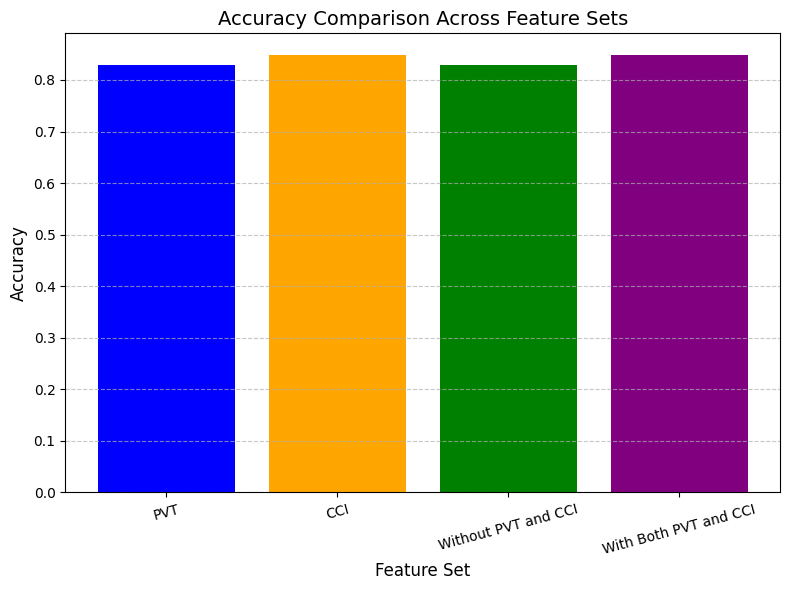

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.bar(comparison["Feature Set"], comparison["Accuracy"], color=['blue', 'orange', 'green', 'purple'])

plt.title("Accuracy Comparison Across Feature Sets", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Feature Set", fontsize=12)
plt.xticks(rotation=15, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
